In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

import os
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import warnings
warnings.filterwarnings('ignore')

In [16]:
Ha_3_4 = get_pkg_data_filename('Mean_NGC2174_Halpha_3_4.FIT')
Hb_3_4 = get_pkg_data_filename('Mean_NGC2174_Hbeta_3_4.FIT')
Ha_3_16 = get_pkg_data_filename('Mean_NGC2174_Halpha_3_16.FIT')
Hb_3_16 = get_pkg_data_filename('Mean_NGC2174_Hbeta_3_16.FIT')

NGC2173_Ha_3_4 = fits.getdata(Ha_3_4)
NGC2173_Hb_3_4 = fits.getdata(Hb_3_4)
NGC2173_Ha_3_16 = fits.getdata(Ha_3_16)
NGC2173_Hb_3_16 = fits.getdata(Hb_3_16)

In [20]:
NGC2173_Ha_3_4 / NGC2173_Hb_3_4

array([[ 1.9604814e+00,  2.7685182e+00,  1.6895004e-01, ...,
         1.3434964e+00,  2.3167329e+00, -8.8584069e+05],
       [ 3.4764445e+00,  2.6519377e+00,  2.9155314e-01, ...,
         2.5254667e+00,  1.9399532e+00,  1.2575926e+00],
       [ 2.0190649e+00,  4.3206654e+00,  3.2919264e-01, ...,
         4.5447741e+00,  2.4031491e+00,  3.0792868e+00],
       ...,
       [-2.2981856e-06,  1.0943146e+01,  1.0561904e+00, ...,
         3.1317389e+00,  2.9302008e+00,  1.8262891e+00],
       [ 3.0064938e+00, -2.3453913e-06,  2.3041472e+00, ...,
         2.5375872e+00,  3.3022864e+00,  2.7703149e+00],
       [ 1.8535461e+00,  3.6415470e+00,  2.3693290e+00, ...,
         3.2508850e+01,  2.2502086e+00,  4.8778065e+01]], dtype=float32)

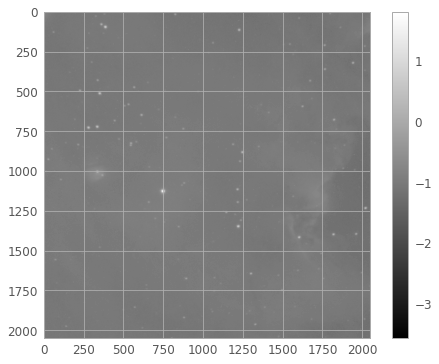

In [18]:
plt.figure()
plt.imshow(np.log10(NGC2173_Ha_3_4), cmap='gray')
plt.colorbar()

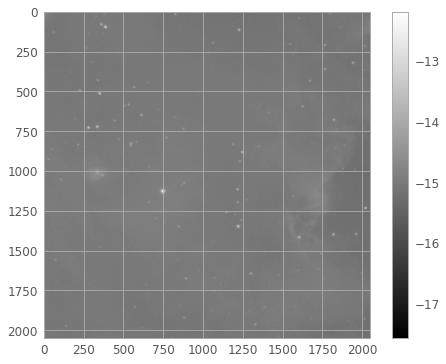

In [19]:
plt.figure()
plt.imshow(np.log10(NGC2173_Ha_3_4_fixed), cmap='gray')
plt.colorbar()

In [4]:
numer = 2.5*np.log10(2.86*(NGC2173_Hb_3_4 / NGC2173_Ha_3_4))

In [5]:
def a(x):
    return 1 + 0.104*(1/x - 1/(1.82*1e-6)) - 0.609*(1/x - 1/(1.82*1e-6))**2 + 0.701*(1/x - 1/(1.82*1e-6))**3 + 1.137*(1/x - 1/(1.82*1e-6))**4 - 1.718*(1/x - 1/(1.82*1e-6))**5 - 0.827*(1/x - 1/(1.82*1e-6))**6 + 1.647*(1/x - 1/(1.82*1e-6))**7 - 0.505*(1/x - 1/(1.82*1e-6))**8

def b(x):
    return 1.952*(1/x - 1/(1.82*1e-6)) + 2.908*(1/x - 1/(1.82*1e-6))**2 - 3.989*(1/x - 1/(1.82*1e-6))**3 - 7.985*(1/x - 1/(1.82*1e-6))**4 + 11.102*(1/x - 1/(1.82*1e-6))**5 + 5.491*(1/x - 1/(1.82*1e-6))**6 - 10.805*(1/x - 1/(1.82*1e-6))**7 + 3.347*(1/x - 1/(1.82*1e-6))**8

In [6]:
Halpha_lambda = 1.31e-7
Hbeta_lambda = 9.84e-8

In [7]:
denom = a(Halpha_lambda) + b(Halpha_lambda)/5 - (a(Hbeta_lambda) + b(Hbeta_lambda)/5)

In [8]:
A_v = numer/denom

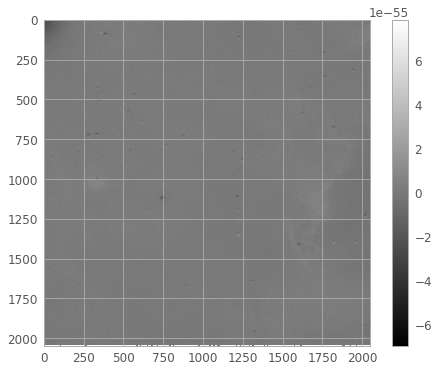

In [9]:
plt.figure()
plt.imshow(A_v, cmap='gray')
plt.colorbar()

In [10]:
np.max(A_v[~np.isnan(A_v)])

7.864678903958177e-55

In [25]:
x = NGC2173_Hb_3_16 / NGC2173_Ha_3_16

In [26]:
np.max(x[~np.isnan(x)])

16.398077

In [27]:
NGC2173_Hb_3_16 / NGC2173_Ha_3_16

array([[ 9.5728600e-01,  1.0064644e+00,  9.4994003e-01, ...,
         5.5669397e-01,  6.4927799e-01, -2.7000960e-06],
       [ 9.6419644e-01,  8.1916964e-01,  1.1460842e+00, ...,
         6.9182020e-01,  4.4240734e-01,  9.9613690e-01],
       [ 9.6366763e-01,  1.1058992e+00,  9.9371004e-01, ...,
         6.1289090e-01,  5.0699508e-01,  6.6834414e-01],
       ...,
       [ 4.4606215e-01,  4.6664613e-01,  5.4332840e-01, ...,
         9.8324293e-01,  8.3134872e-01,  7.5132024e-01],
       [ 5.0046682e-01,  4.6272513e-01,  6.7061192e-01, ...,
         7.0437783e-01,  8.9919066e-01,  6.8201667e-01],
       [ 3.8173261e-01,  7.7444619e-01,  7.1734905e-01, ...,
         1.0310115e+00,  6.7437726e-01,  8.8570410e-01]], dtype=float32)